<a href="https://colab.research.google.com/github/FuadHamdiBahar/Deep-Learning-Machine-Learning-Tasks/blob/main/Clustering_with_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.cluster import (
    KMeans, MeanShift, estimate_bandwidth,
    SpectralClustering, AgglomerativeClustering,  
    Birch, OPTICS, DBSCAN
)    
from sklearn.datasets import make_classification 

Create data using make_classificiation with 1000 samples, 2 features and 2 classes. Create data with 2 features so we can understand and plot it easily.

Text(0.5, 1.0, 'Expected Cluster')

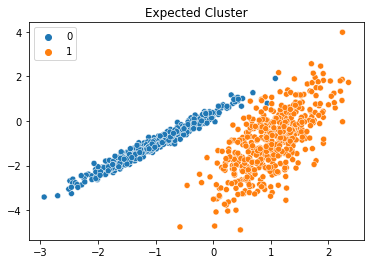

In [2]:
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=2,
    random_state=4
)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y).set_title('Expected Cluster')

We cluster data using several models:


1.   KMeans
2.   Mean Shift
3.   Spectral Clustering
4.   Agglomerative Clustering
5.   DBSCAN
6.   OPTICS
7.   BIRCH

Then evaluate it using a few metrics.






## KMEANS

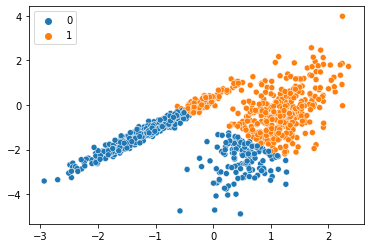

In [3]:
cluster = KMeans(n_clusters=2).fit(X)
km_pred = cluster.predict(X)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=km_pred)

## MEAN SHIFT

[0 1 2]


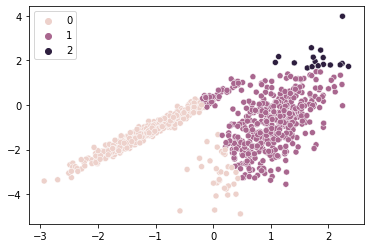

In [4]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=1000)

cluster = MeanShift(bandwidth=bandwidth, bin_seeding=True)
cluster.fit(X)

ms_pred = cluster.predict(X)
print(np.unique(ms_pred))

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=ms_pred)

## SPECTRAL CLUSTERING

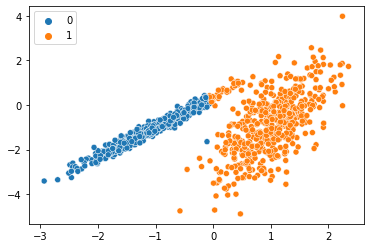

In [5]:
cluster = SpectralClustering(n_clusters= 2).fit(X)
sc_pred = cluster.labels_

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=sc_pred)

## AGGLOMERATIVE CLUSTERING

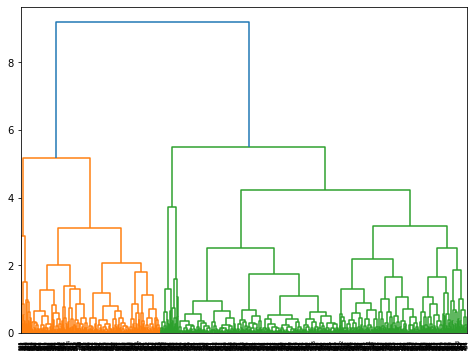

In [6]:
clusters = hierarchy.linkage(X, method="complete")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
plt.axhline(40, color='red', linestyle='--'); 
plt.axhline(30, color='crimson'); 

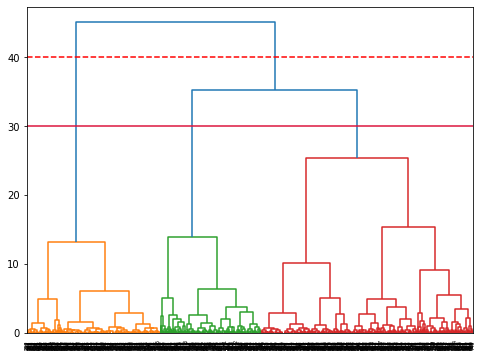

In [7]:
clusters = hierarchy.linkage(X, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
plt.axhline(40, color='red', linestyle='--'); 
plt.axhline(30, color='crimson'); 

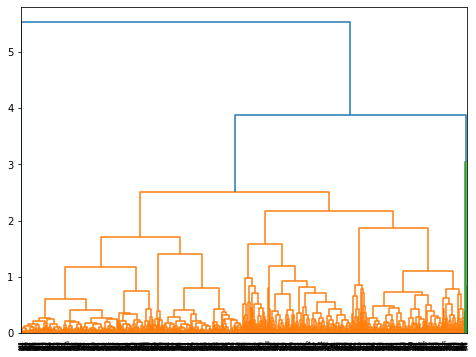

In [8]:
clusters = hierarchy.linkage(X, method="average")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
plt.axhline(40, color='red', linestyle='--'); 
plt.axhline(30, color='crimson'); 

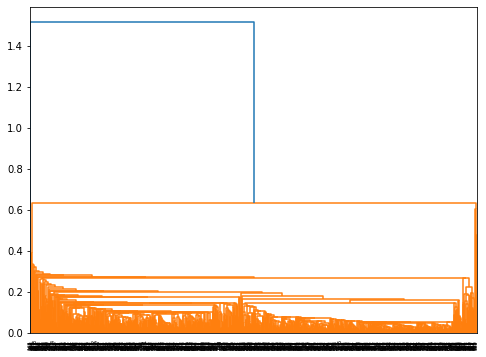

In [9]:
clusters = hierarchy.linkage(X, method="single")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
plt.axhline(40, color='red', linestyle='--'); 
plt.axhline(30, color='crimson'); 

Text(0.5, 1.0, 'Single Linkage')

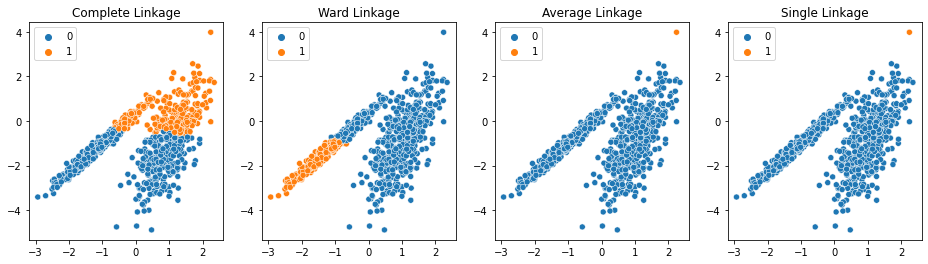

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,4))

cluster = AgglomerativeClustering(n_clusters = 2, linkage='complete').fit(X)
com_ac_pred = cluster.labels_
sns.scatterplot(ax=axes[0], x=X[:, 0], y=X[:, 1], hue=com_ac_pred).set_title('Complete Linkage')

cluster = AgglomerativeClustering(n_clusters = 2, linkage='ward').fit(X)
ward_ac_pred = cluster.labels_
sns.scatterplot(ax=axes[1], x=X[:, 0], y=X[:, 1], hue=ward_ac_pred).set_title('Ward Linkage')

cluster = AgglomerativeClustering(n_clusters = 2, linkage='average').fit(X)
avg_ac_pred = cluster.labels_
sns.scatterplot(ax=axes[2], x=X[:, 0], y=X[:, 1], hue=avg_ac_pred).set_title('Average Linkage')

cluster = AgglomerativeClustering(n_clusters = 2, linkage='single').fit(X)
sin_ac_pred = cluster.labels_
sns.scatterplot(ax=axes[3], x=X[:, 0], y=X[:, 1], hue=sin_ac_pred).set_title('Single Linkage')

## DBSCAN

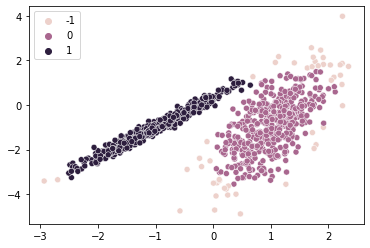

In [11]:
cluster = DBSCAN(eps=0.30, min_samples=9)
db_pred = cluster.fit_predict(X)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=db_pred)

## OPTICS

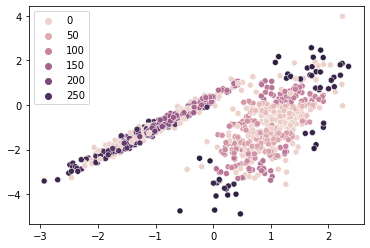

In [12]:
cluster = OPTICS(min_samples=2).fit(X)
op_pred = cluster.labels_

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=op_pred)

## BIRCH

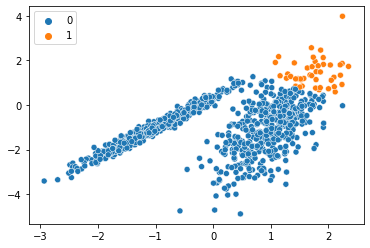

In [13]:
cluster = Birch(n_clusters=2).fit(X)
bi_pred = cluster.labels_

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=bi_pred)

## EVALUATION METRICS

In [34]:
def make_data(a,b,c,d,e,f,g,h,i,j):
    data = {
        'Algorithm': [
            'KMEANS',
            'Mean Shift',
            'Spectral',
            'Complete',
            'Ward',
            'Average',
            'Single',
            'DBSCAN',
            'OPTICS',
            'BIRCH'
        ],
        'Score': [
            a,b,c,d,e,f,g,h,i,j
        ]
    }
    return pd.DataFrame.from_dict(data)

[Text(0, 0, 'KMEANS'),
 Text(0, 0, 'Mean Shift'),
 Text(0, 0, 'Spectral'),
 Text(0, 0, 'Complete'),
 Text(0, 0, 'Ward'),
 Text(0, 0, 'Average'),
 Text(0, 0, 'Single'),
 Text(0, 0, 'DBSCAN'),
 Text(0, 0, 'OPTICS'),
 Text(0, 0, 'BIRCH')]

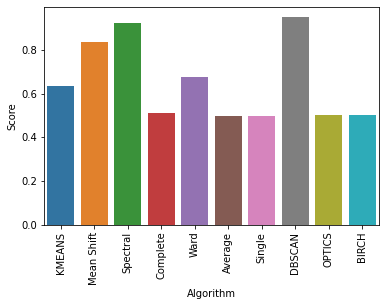

In [38]:
df = make_data(
    metrics.rand_score(y, km_pred),
    metrics.rand_score(y, ms_pred),
    metrics.rand_score(y, sc_pred),
    metrics.rand_score(y, com_ac_pred),
    metrics.rand_score(y, ward_ac_pred),
    metrics.rand_score(y, avg_ac_pred),
    metrics.rand_score(y, sin_ac_pred),
    metrics.rand_score(y, db_pred),
    metrics.rand_score(y, op_pred),
    metrics.rand_score(y, bi_pred)
)

sns.barplot(data=df, x="Algorithm", y="Score").set_xticklabels(rotation=90, labels=df['Algorithm'])

[Text(0, 0, 'KMEANS'),
 Text(0, 0, 'Mean Shift'),
 Text(0, 0, 'Spectral'),
 Text(0, 0, 'Complete'),
 Text(0, 0, 'Ward'),
 Text(0, 0, 'Average'),
 Text(0, 0, 'Single'),
 Text(0, 0, 'DBSCAN'),
 Text(0, 0, 'OPTICS'),
 Text(0, 0, 'BIRCH')]

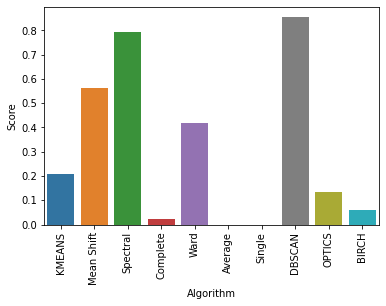

In [39]:
df = make_data(
    metrics.adjusted_mutual_info_score(y, km_pred),
    metrics.adjusted_mutual_info_score(y, ms_pred),
    metrics.adjusted_mutual_info_score(y, sc_pred),
    metrics.adjusted_mutual_info_score(y, com_ac_pred),
    metrics.adjusted_mutual_info_score(y, ward_ac_pred),
    metrics.adjusted_mutual_info_score(y, avg_ac_pred),
    metrics.adjusted_mutual_info_score(y, sin_ac_pred),
    metrics.adjusted_mutual_info_score(y, db_pred),
    metrics.adjusted_mutual_info_score(y, op_pred),
    metrics.adjusted_mutual_info_score(y, bi_pred)
)

sns.barplot(data=df, x="Algorithm", y="Score").set_xticklabels(rotation=90, labels=df['Algorithm'])

[Text(0, 0, 'KMEANS'),
 Text(0, 0, 'Mean Shift'),
 Text(0, 0, 'Spectral'),
 Text(0, 0, 'Complete'),
 Text(0, 0, 'Ward'),
 Text(0, 0, 'Average'),
 Text(0, 0, 'Single'),
 Text(0, 0, 'DBSCAN'),
 Text(0, 0, 'OPTICS'),
 Text(0, 0, 'BIRCH')]

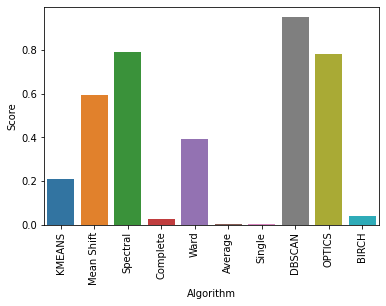

In [40]:
df = make_data(
    metrics.homogeneity_score(y, km_pred),
    metrics.homogeneity_score(y, ms_pred),
    metrics.homogeneity_score(y, sc_pred),
    metrics.homogeneity_score(y, com_ac_pred),
    metrics.homogeneity_score(y, ward_ac_pred),
    metrics.homogeneity_score(y, avg_ac_pred),
    metrics.homogeneity_score(y, sin_ac_pred),
    metrics.homogeneity_score(y, db_pred),
    metrics.homogeneity_score(y, op_pred),
    metrics.homogeneity_score(y, bi_pred)
)

sns.barplot(data=df, x="Algorithm", y="Score").set_xticklabels(rotation=90, labels=df['Algorithm'])

[Text(0, 0, 'KMEANS'),
 Text(0, 0, 'Mean Shift'),
 Text(0, 0, 'Spectral'),
 Text(0, 0, 'Complete'),
 Text(0, 0, 'Ward'),
 Text(0, 0, 'Average'),
 Text(0, 0, 'Single'),
 Text(0, 0, 'DBSCAN'),
 Text(0, 0, 'OPTICS'),
 Text(0, 0, 'BIRCH')]

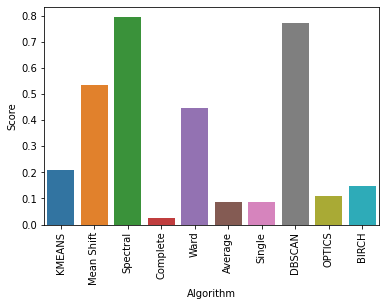

In [41]:
df = make_data(
    metrics.completeness_score(y, km_pred),
    metrics.completeness_score(y, ms_pred),
    metrics.completeness_score(y, sc_pred),
    metrics.completeness_score(y, com_ac_pred),
    metrics.completeness_score(y, ward_ac_pred),
    metrics.completeness_score(y, avg_ac_pred),
    metrics.completeness_score(y, sin_ac_pred),
    metrics.completeness_score(y, db_pred),
    metrics.completeness_score(y, op_pred),
    metrics.completeness_score(y, bi_pred)
)

sns.barplot(data=df, x="Algorithm", y="Score").set_xticklabels(rotation=90, labels=df['Algorithm'])

[Text(0, 0, 'KMEANS'),
 Text(0, 0, 'Mean Shift'),
 Text(0, 0, 'Spectral'),
 Text(0, 0, 'Complete'),
 Text(0, 0, 'Ward'),
 Text(0, 0, 'Average'),
 Text(0, 0, 'Single'),
 Text(0, 0, 'DBSCAN'),
 Text(0, 0, 'OPTICS'),
 Text(0, 0, 'BIRCH')]

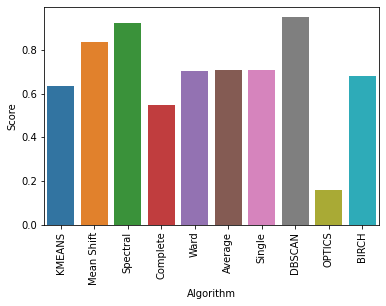

In [42]:
df = make_data(
    metrics.fowlkes_mallows_score(y, km_pred),
    metrics.fowlkes_mallows_score(y, ms_pred),
    metrics.fowlkes_mallows_score(y, sc_pred),
    metrics.fowlkes_mallows_score(y, com_ac_pred),
    metrics.fowlkes_mallows_score(y, ward_ac_pred),
    metrics.fowlkes_mallows_score(y, avg_ac_pred),
    metrics.fowlkes_mallows_score(y, sin_ac_pred),
    metrics.fowlkes_mallows_score(y, db_pred),
    metrics.fowlkes_mallows_score(y, op_pred),
    metrics.fowlkes_mallows_score(y, bi_pred)
)

sns.barplot(data=df, x="Algorithm", y="Score").set_xticklabels(rotation=90, labels=df['Algorithm'])

[Text(0, 0, 'KMEANS'),
 Text(0, 0, 'Mean Shift'),
 Text(0, 0, 'Spectral'),
 Text(0, 0, 'Complete'),
 Text(0, 0, 'Ward'),
 Text(0, 0, 'Average'),
 Text(0, 0, 'Single'),
 Text(0, 0, 'DBSCAN'),
 Text(0, 0, 'OPTICS'),
 Text(0, 0, 'BIRCH')]

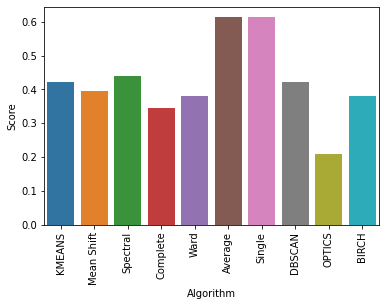

In [51]:
df = make_data(
    metrics.silhouette_score(X, km_pred),
    metrics.silhouette_score(X, ms_pred),
    metrics.silhouette_score(X, sc_pred),
    metrics.silhouette_score(X, com_ac_pred),
    metrics.silhouette_score(X, ward_ac_pred),
    metrics.silhouette_score(X, avg_ac_pred),
    metrics.silhouette_score(X, sin_ac_pred),
    metrics.silhouette_score(X, db_pred),
    metrics.silhouette_score(X, op_pred),
    metrics.silhouette_score(X, bi_pred)
)

sns.barplot(data=df, x="Algorithm", y="Score").set_xticklabels(rotation=90, labels=df['Algorithm'])

[Text(0, 0, 'KMEANS'),
 Text(0, 0, 'Mean Shift'),
 Text(0, 0, 'Spectral'),
 Text(0, 0, 'Complete'),
 Text(0, 0, 'Ward'),
 Text(0, 0, 'Average'),
 Text(0, 0, 'Single'),
 Text(0, 0, 'DBSCAN'),
 Text(0, 0, 'OPTICS'),
 Text(0, 0, 'BIRCH')]

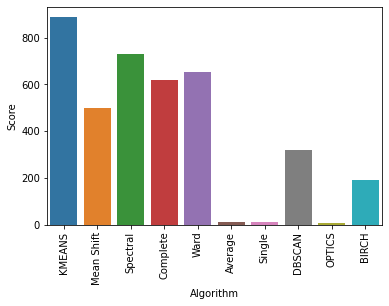

In [52]:
df = make_data(
    metrics.calinski_harabasz_score(X, km_pred),
    metrics.calinski_harabasz_score(X, ms_pred),
    metrics.calinski_harabasz_score(X, sc_pred),
    metrics.calinski_harabasz_score(X, com_ac_pred),
    metrics.calinski_harabasz_score(X, ward_ac_pred),
    metrics.calinski_harabasz_score(X, avg_ac_pred),
    metrics.calinski_harabasz_score(X, sin_ac_pred),
    metrics.calinski_harabasz_score(X, db_pred),
    metrics.calinski_harabasz_score(X, op_pred),
    metrics.calinski_harabasz_score(X, bi_pred)
)

sns.barplot(data=df, x="Algorithm", y="Score").set_xticklabels(rotation=90, labels=df['Algorithm'])

[Text(0, 0, 'KMEANS'),
 Text(0, 0, 'Mean Shift'),
 Text(0, 0, 'Spectral'),
 Text(0, 0, 'Complete'),
 Text(0, 0, 'Ward'),
 Text(0, 0, 'Average'),
 Text(0, 0, 'Single'),
 Text(0, 0, 'DBSCAN'),
 Text(0, 0, 'OPTICS'),
 Text(0, 0, 'BIRCH')]

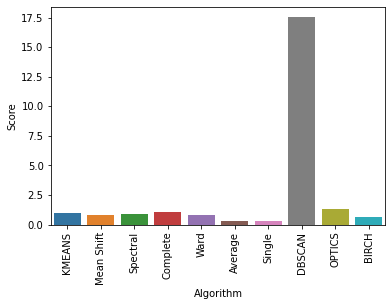

In [53]:
df = make_data(
    metrics.davies_bouldin_score(X, km_pred),
    metrics.davies_bouldin_score(X, ms_pred),
    metrics.davies_bouldin_score(X, sc_pred),
    metrics.davies_bouldin_score(X, com_ac_pred),
    metrics.davies_bouldin_score(X, ward_ac_pred),
    metrics.davies_bouldin_score(X, avg_ac_pred),
    metrics.davies_bouldin_score(X, sin_ac_pred),
    metrics.davies_bouldin_score(X, db_pred),
    metrics.davies_bouldin_score(X, op_pred),
    metrics.davies_bouldin_score(X, bi_pred)
)

sns.barplot(data=df, x="Algorithm", y="Score").set_xticklabels(rotation=90, labels=df['Algorithm'])

In [22]:
print("Contingency Matrix KMEANS: ", metrics.cluster.contingency_matrix(y, km_pred))
print("Contingency Matrix Mean Shift: ", metrics.cluster.contingency_matrix(y, ms_pred))
print("Contingency Matrix Spectral Clustering: ", metrics.cluster.contingency_matrix(y, sc_pred))
print("Contingency Matrix Complete Agglomerative Clustering: ", metrics.cluster.contingency_matrix(y, com_ac_pred))
print("Contingency Matrix Ward Agglomerative Clustering: ", metrics.cluster.contingency_matrix(y, ward_ac_pred))
print("Contingency Matrix Average Agglomerative Clustering: ", metrics.cluster.contingency_matrix(y, avg_ac_pred))
print("Contingency Matrix Single Agglomerative Clustering: ", metrics.cluster.contingency_matrix(y, sin_ac_pred))
print("Contingency Matrix DBSCAN: ", metrics.cluster.contingency_matrix(y, db_pred))
print("Contingency Matrix OPTICS: ", metrics.cluster.contingency_matrix(y, op_pred))
print("Contingency Matrix BIRCH: ", metrics.cluster.contingency_matrix(y, bi_pred))

Contingency Matrix KMEANS:  [[397 104]
 [135 364]]
Contingency Matrix Mean Shift:  [[452  48   1]
 [ 33 450  16]]
Contingency Matrix Spectral Clustering:  [[463  38]
 [  1 498]]
Contingency Matrix Complete Agglomerative Clustering:  [[386 115]
 [300 199]]
Contingency Matrix Ward Agglomerative Clustering:  [[202 299]
 [499   0]]
Contingency Matrix Average Agglomerative Clustering:  [[501   0]
 [498   1]]
Contingency Matrix Single Agglomerative Clustering:  [[501   0]
 [498   1]]
Contingency Matrix DBSCAN:  [[  4   1 496]
 [ 44 453   2]]
Contingency Matrix OPTICS:  [[115   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [23]:
print("Pair Confusion Matrix KMEANS: ", metrics.cluster.pair_confusion_matrix(y, km_pred))
print("Pair Confusion Matrix Mean Shift: ", metrics.cluster.pair_confusion_matrix(y, ms_pred))
print("Pair Confusion Matrix Spectral Clustering: ", metrics.cluster.pair_confusion_matrix(y, sc_pred))
print("Pair Confusion Matrix Complete Agglomerative Clustering: ", metrics.cluster.pair_confusion_matrix(y, com_ac_pred))
print("Pair Confusion Matrix Ward Agglomerative Clustering: ", metrics.cluster.pair_confusion_matrix(y, ward_ac_pred))
print("Pair Confusion Matrix Average Agglomerative Clustering: ", metrics.cluster.pair_confusion_matrix(y, avg_ac_pred))
print("Pair Confusion Matrix Single Agglomerative Clustering: ", metrics.cluster.pair_confusion_matrix(y, sin_ac_pred))
print("Pair Confusion Matrix DBSCAN: ", metrics.cluster.pair_confusion_matrix(y, db_pred))
print("Pair Confusion Matrix OPTICS: ", metrics.cluster.pair_confusion_matrix(y, op_pred))
print("Pair Confusion Matrix BIRCH: ", metrics.cluster.pair_confusion_matrix(y, bi_pred))

Pair Confusion Matrix KMEANS:  [[317096 182902]
 [180856 318146]]
Pair Confusion Matrix Mean Shift:  [[426934  73064]
 [ 89548 409454]]
Pair Confusion Matrix Spectral Clustering:  [[461224  38774]
 [ 36184 462818]]
Pair Confusion Matrix Complete Agglomerative Clustering:  [[222628 277370]
 [208180 290822]]
Pair Confusion Matrix Ward Agglomerative Clustering:  [[298402 201596]
 [120796 378206]]
Pair Confusion Matrix Average Agglomerative Clustering:  [[  1002 498996]
 [   996 498006]]
Pair Confusion Matrix Single Agglomerative Clustering:  [[  1002 498996]
 [   996 498006]]
Pair Confusion Matrix DBSCAN:  [[496756   3242]
 [ 46820 452182]]
Pair Confusion Matrix OPTICS:  [[478366  21632]
 [475532  23470]]
Pair Confusion Matrix BIRCH:  [[ 43912 456086]
 [ 40216 458786]]
